# Nama: Laksmi Dyah Nurlita
# NIM: 21110023
# Kelas:S1SD02-A

# **SOAL A (DATASET REGRESI)**
> Langkah terdiri atas:
1. EDA
2. Data Preprocessing
3. Modelling
4. Evaluasi Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/LAKSMI/dataset_regresi.csv')
df.head()

,Umur,Tinggi,Berat,Kalori
0,46,177,63,1287.1
1,27,179,77,3095.5
2,24,154,42,2792.4
3,20,153,50,1835.5
4,29,177,61,2787.1


**EDA**

In [3]:
df.head()

,Umur,Tinggi,Berat,Kalori
0,46,177,63,1287.1
1,27,179,77,3095.5
2,24,154,42,2792.4
3,20,153,50,1835.5
4,29,177,61,2787.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Umur    100 non-null    int64  
 1   Tinggi  100 non-null    int64  
 2   Berat   100 non-null    int64  
 3   Kalori  100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [5]:
df.describe()

,Umur,Tinggi,Berat,Kalori
count,100.000000,100.000000,100.000000,100.000000
mean,39.750000,170.430000,66.070000,2109.081000
std,11.514045,11.339798,17.207736,551.254391
min,20.000000,150.000000,40.000000,1200.300000
25%,29.000000,161.500000,50.000000,1638.200000
50%,40.500000,173.000000,63.500000,2126.750000
75%,50.000000,180.000000,80.250000,2499.475000
max,58.000000,189.000000,99.000000,3165.200000


In [7]:
#Mengecek data apakah ada data yg kosong (NULL)
df.isna().sum()

Umur      0
Tinggi    0
Berat     0
Kalori    0
dtype: int64

Tidak terdapat data yang kosong (NULL)

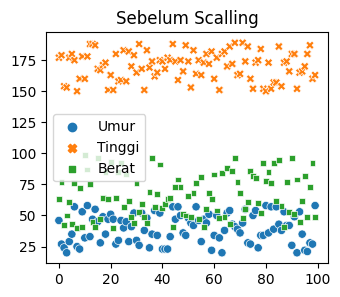

In [10]:
# Visualisasi data untuk melihat sebaran data
plt.figure(figsize = (8,3))
plt.subplot(1, 2, 1)
plt.title('Sebelum Scalling')
sns.scatterplot(data = df.drop(columns = 'Kalori'), color = 'Red')

plt.legend()
plt.show()

**Data Preprocessing**

In [11]:
#Data X
X = df.drop(columns = 'Kalori', axis = 1)
X.head()

,Umur,Tinggi,Berat
0,46,177,63
1,27,179,77
2,24,154,42
3,20,153,50
4,29,177,61


In [12]:
#Data Y
y = df['Kalori']
y.head()

0    1287.1
1    3095.5
2    2792.4
3    1835.5
4    2787.1
Name: Kalori, dtype: float64

Jumlah data yang digunakan sedikit serta range data sangat jauh, maka tidak dilakukan 'Split Data'. Karena akan menghasilkan nolai R Squared negatif.

In [13]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

scale.fit(X)
scaled_X = scale.transform(X)

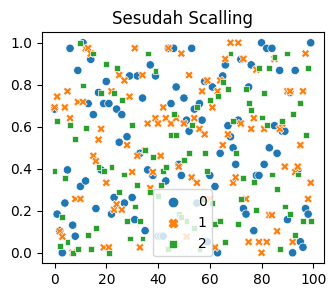

In [14]:
#Visualisasi
plt.figure(figsize = (8,3))
plt.subplot(1, 2, 1)
plt.title('Sesudah Scalling')
sns.scatterplot(data = scaled_X, color = 'Red')

plt.legend()
plt.show()

> Dari hasil grafik diatas, dapat dilihat data yang acak dan tidak konsisten.

> Setelah melakukan beberapa fitur scaling, tidak ada yang memberikan hasil yang baik, nilai R Square kecil.

**Modelling --> Multiple Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(scaled_X, y)

LinearRegression()

In [16]:
#Buat y prediksi
y_pred = lr.predict(scaled_X)

**Evaluasi**

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

#Hitung Mean Squared Error
mse = mean_squared_error(y, y_pred)

#Hitung R Square
rsq = r2_score(y, y_pred)

print('Mean Squared Error: ', mse)
print('R Square: ', rsq)

Mean Squared Error:  300513.01387161476
R Square:  0.0010955100055882738


Diperoleh nilai R Square sebesar 0,001 atau 0,1%. Variabel independen (Umur, Tinggi, dan Berat) hanya mampu mempengaruhi variabel dependen (kalori) sebesar 0,1%.
> Dapat disimpulkan bahwa data tersebut kurang cocok jika diprediksi menggunakan Linear Regression.

**Interpretasi Model**

In [19]:
#Nilai intercept dan koefisien
print('Nilai Intercept: ', lr.intercept_)
print('Nilai Koefisien: ', lr.coef_)

Nilai Intercept:  2156.014675982103
Nilai Koefisien:  [-57.07058782 -20.62330666 -14.63921719]


y = intercept + coef(i)*X(i) </br>
y = 2156.014675982103 - 57.07058782X1 - 20.62330666X2 - 14.63921719X3

> interpretasi: </br>
dari model tersebut, dapat dilihat bahwa ketiga variabel mempunyai pengaruh negatif. Setiap kenailan 1% Umur, mampu menurunkan kalori sebesar -57.07058782. Setiap kenaikan 1% Tinggi, mampu menurunkan kalori sebesar -20.62330666. Serta setiap kenaikan 1% variabel Berat, mampu menurunkan kalori -14.63921719. Diantara ketiga variabel, yang mempunyai pengaruh paling tinggi adalah variabel Umur sebesar -57.07058782.




**Modelling --> KNN Regression**

In [21]:
#Split Data
from sklearn.model_selection import train_test_split

x = df[['Umur', 'Tinggi', 'Berat']]
y = df['Kalori']

# Split data jadi traindan test dengan ukuran tes 20% dan random state 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Saat split dijalankan, R square yang diperoleh bernilai minus. Maka, split tidak digunakan

In [22]:
from sklearn.neighbors import KNeighborsRegressor

#Training model menggunakan k = 2
knn_r = KNeighborsRegressor(n_neighbors = 2)
knn_r.fit(scaled_X, y)

KNeighborsRegressor(n_neighbors=2)

In [23]:
#Prediksi
y_pred = knn_r.predict(scaled_X)

**Evaluasi**

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Mean Squared Error
mse = mean_squared_error(y, y_pred)
print('MSE: ', mse)

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

#R Squared
r2 = r2_score(y, y_pred)
print('R Squared', r2)

#Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print('MAE: ', mae)

MSE:  153350.1912
RMSE:  391.599529111055
R Squared 0.49026435641611155
MAE:  320.415


Diperoleh nilai R Square sebesar 0.49 atau 49% yang berarti, dimana variabel independen mampu menjelaskan variabel sebesar 49%.

In [25]:
#Mencari Jumlah K terbaik
mse_val = []
k = []

#Looping train model dgn k 1-50
for i in range (1, 51):
  k.append(i)
  knn_r = KNeighborsRegressor(i)
  knn_r.fit(scaled_X, y)
  #Prediksi
  y_pred = knn_r.predict(scaled_X)
  #Evaluasi
  mse = mean_squared_error(y, y_pred)
  mse_val.append(mse)
  print('n-neighbors: ' + str(i) + ', MSE: ' + str(mse))

n-neighbors: 1, MSE: 0.0
n-neighbors: 2, MSE: 153350.1912
n-neighbors: 3, MSE: 170596.74275555558
n-neighbors: 4, MSE: 205671.1769625
n-neighbors: 5, MSE: 228958.14555599997
n-neighbors: 6, MSE: 254788.41306111112
n-neighbors: 7, MSE: 270133.33538367343
n-neighbors: 8, MSE: 277117.77329531254
n-neighbors: 9, MSE: 279593.85573456786
n-neighbors: 10, MSE: 290025.08254800003
n-neighbors: 11, MSE: 298453.57398512395
n-neighbors: 12, MSE: 300597.0849256944
n-neighbors: 13, MSE: 299751.6159627219
n-neighbors: 14, MSE: 306094.2214413265
n-neighbors: 15, MSE: 304847.23649599997
n-neighbors: 16, MSE: 302050.15963281255
n-neighbors: 17, MSE: 305912.0780809689
n-neighbors: 18, MSE: 299410.83566419757
n-neighbors: 19, MSE: 296764.4368545706
n-neighbors: 20, MSE: 298683.6336475001
n-neighbors: 21, MSE: 296236.5248689342
n-neighbors: 22, MSE: 298349.3582599173
n-neighbors: 23, MSE: 299510.147021361
n-neighbors: 24, MSE: 299140.80118888884
n-neighbors: 25, MSE: 298595.86877632
n-neighbors: 26, MSE: 2

Text(0, 0.5, 'MSE')

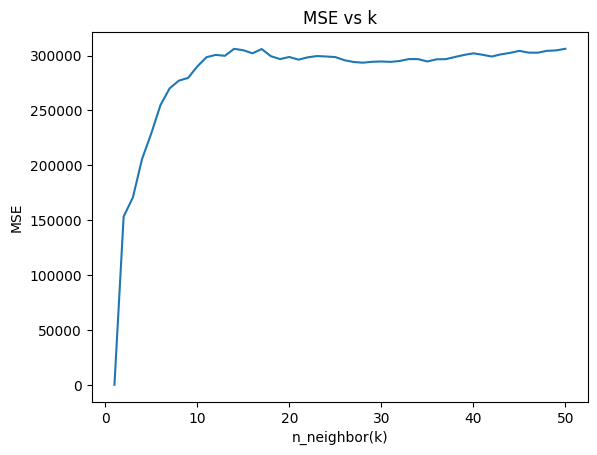

In [26]:
#Visualisasi Hasi MSE
plt.plot(k, mse_val)
plt.title('MSE vs k')
plt.xlabel('n_neighbor(k)')
plt.ylabel('MSE')

Diperoleh k terbaik, yaitu k = 2 dengan nilai MSE sebesar 153350.1912

**Perbedaan Linear Regression dan KNN**
> Pada Linear Regression diperoleh R Square sebesar 0.1%, sedangkan pada KNN diperoleh R Square sebesar 0.4%.
> Dapat disimpulkan bahwa dengan menggunakan KNN lebih baik untuk memprediksi Kalori berdasarkan Umur, Berat, dan Tinggi.

# **SOAL B**

In [27]:
#import library yang dibutuhkan
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [28]:
data = pd.read_csv('/content/drive/MyDrive/LAKSMI/train.csv')

**EDA**

In [29]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y
0,1.945555,-1.016304,0.202932,0.239453,-0.101111,-0.334786,-1.805850,0.048545,0.045663,0.085785,...,0.087040,1.541526,-0.498667,0.323126,0.378722,0.659902,-0.493005,-0.765309,1.590061,0
1,0.654257,1.051849,-2.483526,-1.567193,-0.619941,0.042943,-1.084717,-1.704654,-1.720863,1.684433,...,0.205246,0.768783,-1.276237,-0.461104,0.613060,0.046744,0.459072,-0.543170,0.662766,0
2,-1.192323,-0.037059,-0.760178,-0.738796,2.365061,0.702868,-0.051502,-0.164028,0.711604,0.482474,...,0.238371,0.244745,-0.484853,-0.323788,2.776135,-0.486273,-0.146642,0.051576,-0.418848,1
3,-0.254714,0.088775,-1.858713,0.874019,-0.110565,-0.892969,-0.394713,-1.889068,0.373585,0.963552,...,0.890959,-0.226851,0.237959,-1.737111,-1.273344,0.445285,0.302280,-1.074715,-0.980943,0
4,-0.570131,1.360070,0.387162,-0.865268,-1.233768,0.943654,-0.263902,1.012036,0.439330,0.340239,...,1.104235,-0.731008,-1.956339,-1.974099,0.110919,0.536349,1.800659,-0.980357,1.458631,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      40000 non-null  float64
 1   X2      40000 non-null  float64
 2   X3      40000 non-null  float64
 3   X4      40000 non-null  float64
 4   X5      40000 non-null  float64
 5   X6      40000 non-null  float64
 6   X7      40000 non-null  float64
 7   X8      40000 non-null  float64
 8   X9      40000 non-null  float64
 9   X10     40000 non-null  float64
 10  X11     40000 non-null  float64
 11  X12     40000 non-null  float64
 12  X13     40000 non-null  float64
 13  X14     40000 non-null  float64
 14  X15     40000 non-null  float64
 15  X16     40000 non-null  float64
 16  X17     40000 non-null  float64
 17  X18     40000 non-null  float64
 18  X19     40000 non-null  float64
 19  X20     40000 non-null  float64
 20  y       40000 non-null  int64  
dtypes: float64(20), int64(1)
memory usa

In [31]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.001555,-0.005395,-0.434075,0.000896,-0.001206,0.078868,0.010926,-0.279659,0.003471,0.243042,...,-0.008901,0.003604,-0.083067,-0.009668,0.001908,0.000147,0.001898,0.008535,-0.004284,0.182900
std,1.003099,1.000902,1.268174,1.005950,1.001857,1.182581,1.008307,1.259904,0.997098,0.928928,...,1.005186,1.001055,1.252816,1.001171,1.002175,0.998021,0.996840,1.001312,1.003866,0.386589
min,-4.295688,-4.031385,-6.207460,-4.410187,-4.028216,-4.944611,-3.874637,-6.015929,-4.058806,-4.692449,...,-4.308618,-3.982968,-5.079725,-3.960667,-4.084951,-3.878464,-4.251726,-3.971091,-4.252604,0.000000
25%,-0.679885,-0.679958,-1.201478,-0.686920,-0.679621,-0.711933,-0.666786,-1.089624,-0.670618,-0.248465,...,-0.683744,-0.674012,-0.928525,-0.684791,-0.674195,-0.665590,-0.675483,-0.663131,-0.684622,0.000000
50%,-0.002068,-0.003925,-0.418181,-0.002206,-0.003937,0.104603,0.006390,-0.250041,-0.002378,0.253484,...,-0.015696,-0.001635,-0.080693,-0.010851,0.008605,-0.002707,0.000091,0.015015,-0.000296,0.000000
75%,0.677054,0.667813,0.362877,0.684975,0.679601,0.887342,0.691908,0.593365,0.674291,0.820807,...,0.669553,0.680269,0.765493,0.666883,0.673619,0.665249,0.677543,0.685363,0.674835,0.000000
max,4.474327,3.976449,5.741914,4.469424,3.973521,5.617003,4.035779,5.655429,4.836956,4.360675,...,3.912316,3.976569,4.710651,4.489546,3.728837,3.915494,4.201447,3.849052,3.940802,1.000000


In [32]:
#Mengecek data apakah ada data yg kosong (NULL)
data.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
y      0
dtype: int64

**Data Preprocessing**

In [34]:
X2 = data.drop(columns = 'y')
y2 = data['y']

In [35]:
#Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 1)

**Modelling**

In [36]:
clf = MLPClassifier(hidden_layer_sizes = (100, 100), random_state = 1, max_iter = 300)
clf = clf.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Evaluasi**

In [38]:
y_pred = clf.predict(X_test2)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Skor Akurasi: ', accuracy_score(y_test2, y_pred))

Skor Akurasi:  0.8515


Diperoleh nilai akurasi sebesar 0.8515 atau 85%

In [39]:
#Menampilkan Classification Report
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8184
           1       0.59      0.61      0.60      1816

    accuracy                           0.85     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.85      0.85      0.85     10000



1. Precision untuk kelas 0 adalah 0.91, sedangkan untuk kelas 1 adalah 0.59. Berarti, model cenderung lebih akurat dalam memprediksi contoh kelas 0 daripada kelas 1.
2. Recall untuk kelas 0 adalah 0.91, sedangkan untuk kelas 1 adalah 0.61. Artinya, model cenderung lebih baik dalam mengidentifikasi contoh kelas 0 daripada kelas 1.
3. F1-Score untuk kelas 0 adalah 0.91, sedangkan untuk kelas 1 adalah 0.60. F1-Score biasanya menjadi metrik evaluasi yang lebih baik dibandingkan dengan akurasi pada dataset yang tidak seimbang.
3. Accuracy yang diperoleh adalah 0.85, artinya model berhasil memprediksi dengan benar 85% dari total data test.
4. Macro avg untuk dataset ini adalah 0.75.
5. Weighted avg untuk dataset ini adalah 0.85.

> Dapat disimpulkan, prediksi yang dilakukan sudah cukup baik dan tidak memerlukan transformasi data

<Axes: >

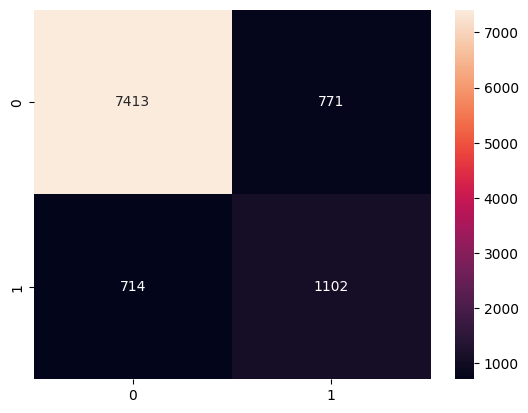

In [41]:
#Menampilkan Confussion Matrix
cm = np.array(confusion_matrix(y_test2, y_pred, labels = [0,1]))
sns.heatmap(cm, annot = True, fmt = 'g')

1. Pada model memprediksi True (1) dengan data aslli True (1) sebesar 1102
2. Pada model memprediksi False (0) dengan data asli False (0) sebesar 7413
3. Pada model memprediksi True (1) dan data asli False (0) sebesar 714
4. Pada model memprediksi False (0) dan data asli True (1) sebesar 771

In [42]:
#Perbandingan data prediksi dengan data sebenarnya
per_data = pd.DataFrame({'Data Sebenarnya' : y_test2, 'Data Prediksi' : y_pred})
per_data

,Data Sebenarnya,Data Prediksi
3841,0,0
12898,0,0
15032,0,0
36781,0,0
9201,0,0
...,...,...
56,0,0
11647,0,0
25221,1,1
31701,0,0


**Prediksi dengan Data Test yang Disediakan**

In [43]:
test = pd.read_csv('/content/drive/MyDrive/LAKSMI/test.csv')
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,-0.028219,0.549561,-2.418207,-1.044998,0.407799,0.619205,0.106923,-1.270405,-0.313204,1.842582,1.009887,0.822982,-0.906015,-2.040488,-0.651876,0.221558,2.059341,0.107250,-0.030640,1.333016
1,0.094844,0.792163,-2.752377,1.203003,-1.375144,0.515847,-1.664628,-1.614125,-1.618791,1.926683,-0.149003,0.336739,0.580149,-1.735681,-2.340054,-1.605809,1.046785,-0.647790,1.490847,-2.286397
2,-0.484681,0.109923,0.694203,-0.155574,-1.231342,0.396700,0.652140,0.796323,0.478648,-0.214443,1.170610,0.105685,2.057264,-0.561242,-2.034570,-1.365867,-0.096811,-0.977088,1.341149,-0.489354
3,-0.596665,0.825206,0.255655,0.160876,-1.804463,1.741996,-0.747668,1.027326,-1.443739,-0.395399,-1.250914,0.194622,-2.495038,0.324393,2.124874,-2.035139,0.369559,-0.357417,-0.070363,0.267091
4,-0.682088,2.139841,-0.592823,2.540552,0.699323,-0.390922,-2.359481,-0.562410,-0.182688,0.555894,-1.567071,-1.652555,0.197548,-0.670142,-0.494038,0.063157,-0.733466,0.739299,1.020933,0.130093


In [45]:
#Prediksi dengan data test baru
prediksi = clf.predict(test)

hasil = pd.DataFrame({'Prediski': prediksi})
hasil

,Prediski
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,1
9997,0
9998,0


In [46]:
#Menyimpan Hasil
hasil = hasil.rename(columns = {'prediksi' : 'y'})
hasil

,Prediski
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,1
9997,0
9998,0


In [47]:
hasil.to_csv('21110023.csv', index = False)